In [ ]:
# backtrack
# Time complexity: O(2^M * N)
# Space complexity: O(N+M)
# N is the number of buildings, and M is the number of requests.
class Solution:
    def __init__(self):
        self.ans = 0

    # backtrack: explor all possible combinations of (not) taking requests
    def helper(self, start, requests, indegree, n, count):
        
        # all requests are proceeded
        if start == len(requests):
            for i in range(n):
                if indegree[i] != 0:
                    return
            # if all buildings are balanced: all 0
            # update ans with max counts
            self.ans = max(self.ans, count)
            return

        # Take 
        indegree[requests[start][0]] -= 1
        indegree[requests[start][1]] += 1
        self.helper(start + 1, requests, indegree, n, count + 1)

        # Not-take
        #  revert the changes made in "Take"
        indegree[requests[start][0]] += 1
        indegree[requests[start][1]] -= 1
        self.helper(start + 1, requests, indegree, n, count)

    def maximumRequests(self, n, requests):
        #difference between incoming and outgoing requests for each building
        indegree = [0] * n
        self.helper(0, requests, indegree, n, 0)
        return self.ans

1601. Maximum Number of Achievable Transfer Requests
      Hard
      1.3K
      64
      Companies
      We have n buildings numbered from 0 to n - 1. Each building has a number of employees. It's transfer season, and some employees want to change the building they reside in.

You are given an array requests where requests[i] = [fromi, toi] represents an employee's request to transfer from building fromi to building toi.

All buildings are full, so a list of requests is achievable only if for each building, the net change in employee transfers is zero. This means the number of employees leaving is equal to the number of employees moving in. For example if n = 3 and two employees are leaving building 0, one is leaving building 1, and one is leaving building 2, there should be two employees moving to building 0, one employee moving to building 1, and one employee moving to building 2.

Return the maximum number of achievable requests.

Example 1:
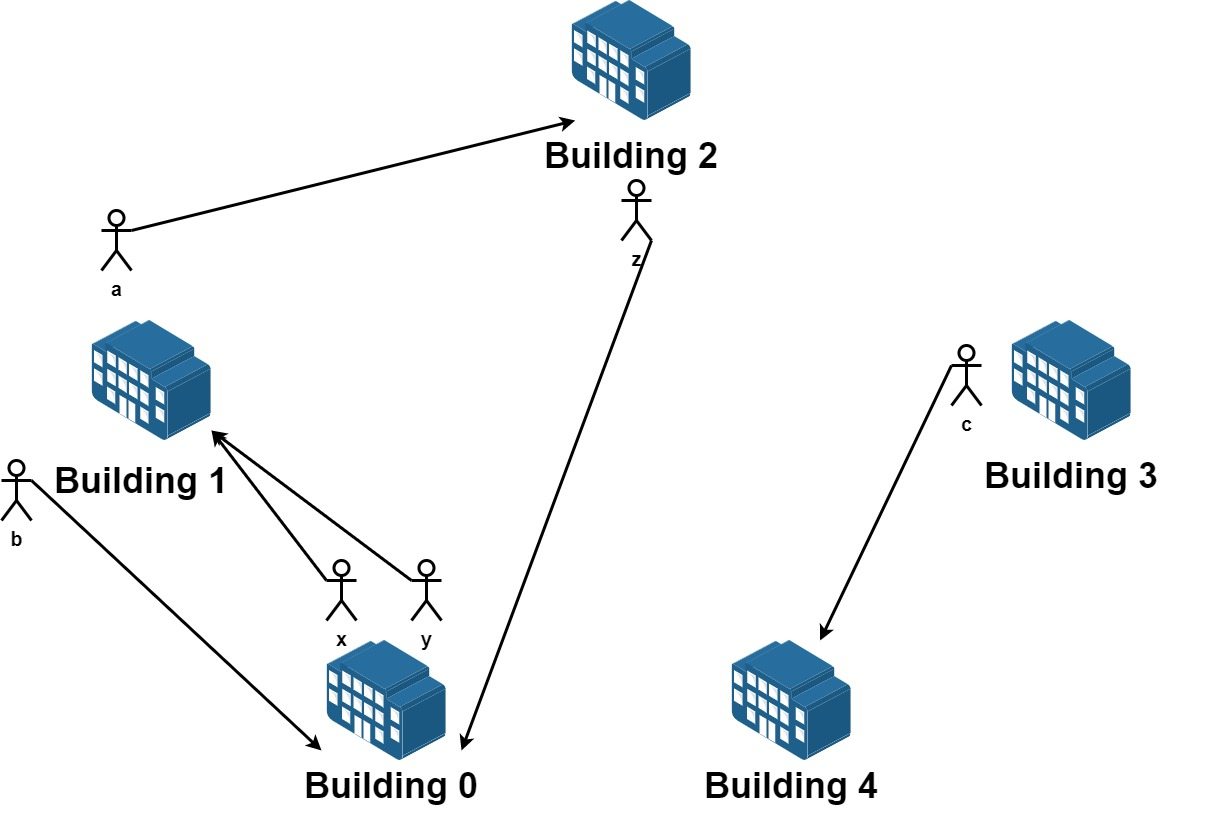

Input: n = 5, requests = [[0,1],[1,0],[0,1],[1,2],[2,0],[3,4]]
Output: 5
Explantion: Let's see the requests:
From building 0 we have employees x and y and both want to move to building 1.
From building 1 we have employees a and b and they want to move to buildings 2 and 0 respectively.
From building 2 we have employee z and they want to move to building 0.
From building 3 we have employee c and they want to move to building 4.
From building 4 we don't have any requests.
We can achieve the requests of users x and b by swapping their places.
We can achieve the requests of users y, a and z by swapping the places in the 3 buildings.

Example 2:
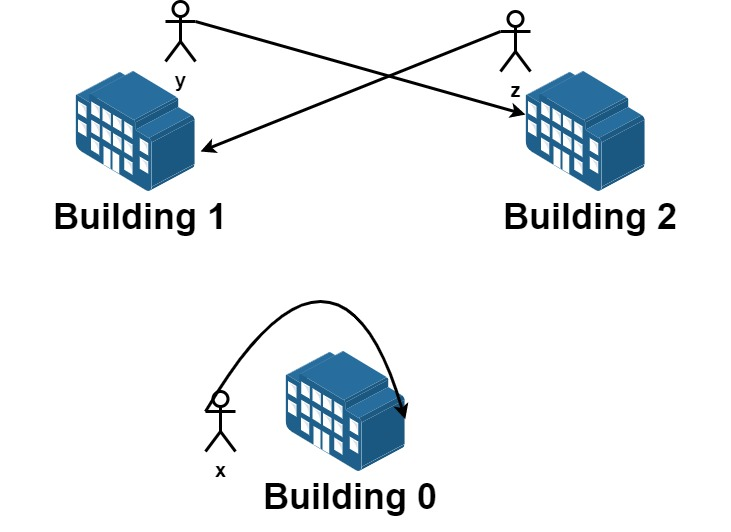

Input: n = 3, requests = [[0,0],[1,2],[2,1]]
Output: 3
Explantion: Let's see the requests:
From building 0 we have employee x and they want to stay in the same building 0.
From building 1 we have employee y and they want to move to building 2.
From building 2 we have employee z and they want to move to building 1.
We can achieve all the requests.
Example 3:

Input: n = 4, requests = [[0,3],[3,1],[1,2],[2,0]]
Output: 4

Constraints:

1 <= n <= 20
1 <= requests.length <= 16
requests[i].length == 2
0 <= fromi, toi < n
